# Erste Analyse

In [1]:
# imports
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# export options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.display import HTML

HTML("""
<style>
    /* Make dataframe scrollable */
    .dataframe {
        display: block;
        overflow-x: auto;
        white-space: nowrap;
    }
    /* Set text background to white and text color to black */
    body {
        background-color: white !important;
        color: black !important;
    }
    /* Ensure all text elements have a white background and black text */
    p, li, h1, h2, h3, h4, h5, h6, span, div {
        background-color: white !important;
        color: black !important;
    }
</style>
""")

In [3]:
import os
os.chdir('../../..')

In [4]:
# Important! Set project root as current working directory
from src.utils import get_project_root
import os

root = get_project_root()
os.chdir(root)

In [5]:
# get file_id to read dataset
json_file_path = 'credentials/file_ids.json'

with open(json_file_path, 'r') as j:
     file_id_bl = json.loads(j.read())['baseline']

with open(json_file_path, 'r') as j:
     file_id_fu = json.loads(j.read())['follow_up']

In [6]:
# read file
bl = pd.read_csv('data/d01_raw/rki_heart_baseline.csv', parse_dates=['created_at'], index_col='answer_id')

fu = pd.read_csv('data/d01_raw/rki_heart_followup.csv', parse_dates=['created_at'], index_col='answer_id')

## Get some baseline facts

In [7]:
# n participants
bl.user_id.nunique()

1805

In [8]:
# n follow-up assessments
fu.shape[0]

5895

## How many follow-up assessments over the time?

In [9]:
print('Number of monthly active users in baseline')
bl['YYYY-MM'] = bl.created_at.dt.strftime('%Y-%m')
bl.groupby('YYYY-MM').nunique()['user_id']

Number of monthly active users in baseline


YYYY-MM
2020-07     89
2020-08    566
2020-09     74
2020-10    204
2020-11    132
2020-12    137
2021-01     88
2021-02     41
2021-03     79
2021-04     57
2021-05     45
2021-06     34
2021-07     18
2021-08      7
2021-09      7
2021-10     64
2021-11     39
2021-12     22
2022-01     24
2022-02     17
2022-03      4
2022-04      2
2022-05     11
2022-06      7
2022-07      5
2022-08      4
2022-09      3
2022-10      9
2022-11      4
2023-01      2
2023-02      2
2023-03      1
2023-04      1
2023-05      2
2023-08      2
2023-09      2
Name: user_id, dtype: int64

In [10]:
print('n assessments per month in follow up')
fu['YYYY-MM'] = fu.created_at.dt.strftime('%Y-%m')
fu['YYYY-MM'].value_counts().sort_index()

n assessments per month in follow up


YYYY-MM
2020-07      1
2020-08    397
2020-09    427
2020-10    395
2020-11    438
2020-12    445
2021-01    409
2021-02    348
2021-03    347
2021-04    309
2021-05    297
2021-06    209
2021-07    156
2021-08    139
2021-09    108
2021-10    129
2021-11    171
2021-12    134
2022-01    141
2022-02     68
2022-03    102
2022-04     56
2022-05    150
2022-06     85
2022-07     64
2022-08     79
2022-09     58
2022-10     48
2022-11     35
2022-12     27
2023-01     28
2023-02     21
2023-03     19
2023-04     19
2023-05     12
2023-06      6
2023-07      6
2023-08      6
2023-09      2
2023-10      4
Name: count, dtype: int64

In [11]:
print('Number of monthly active users in follow up')
fu.groupby('YYYY-MM').nunique()['user_id']

Number of monthly active users in follow up


YYYY-MM
2020-07      1
2020-08    308
2020-09    257
2020-10    249
2020-11    255
2020-12    232
2021-01    236
2021-02    199
2021-03    186
2021-04    174
2021-05    161
2021-06    127
2021-07     93
2021-08     70
2021-09     64
2021-10     80
2021-11     87
2021-12     76
2022-01     77
2022-02     56
2022-03     45
2022-04     28
2022-05     42
2022-06     46
2022-07     37
2022-08     39
2022-09     36
2022-10     28
2022-11     24
2022-12     17
2023-01     17
2023-02     13
2023-03     12
2023-04     14
2023-05      8
2023-06      4
2023-07      4
2023-08      3
2023-09      2
2023-10      2
Name: user_id, dtype: int64

In [14]:
# Age
bl.alter.describe()

count    684.000000
mean      41.682749
std       15.093178
min       18.000000
25%       30.000000
50%       40.000000
75%       53.000000
max      120.000000
Name: alter, dtype: float64

In [17]:
bl.country.value_counts(normalize=True)

country
DEU    0.986842
AUT    0.004386
MEX    0.001462
GBR    0.001462
AND    0.001462
NLD    0.001462
FRA    0.001462
ATG    0.001462
Name: proportion, dtype: float64

In [19]:
bl.geschlecht.value_counts(normalize=True)

geschlecht
0.0    0.633041
1.0    0.362573
2.0    0.004386
Name: proportion, dtype: float64

## Welche Domänen (alle im Fragebogen) wurden über die Zeit wie häufig befüllt und ausgefüllt im Zeitverlauf

**Zwischen den Domänen sind keine großen Unterschiede im Zeitverlauf. Wenn es in einem Monat viele aktive Nutzer gab, dann auch in den jeweiligen Domänen. Die unten stehende Tabelle gibt die Anzahl der vorhandenen Werte in diesem Jahr und Monat (YYYY-MM) für alle Variablen an.**

In [12]:
bl['YYYY-MM'] = bl.created_at.dt.strftime('%Y-%m')
res = bl.groupby('YYYY-MM').apply(lambda x: x.notnull().sum())
# res.to_excel('results/first_glance/non_null_count_per_month_and_variable.xlsx')
res

/var/folders/gd/33s144q948l12nxsrzffm0s80000gn/T/ipykernel_3545/1224922613.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = bl.groupby('YYYY-MM').apply(lambda x: x.notnull().sum())


,questionnaire_id,user_id,created_at,sensordata_apps,sensordata_beginTime,sensordata_collected_at,sensordata_endTime,sensordata_name,sensordata_sleepTimes,sensordata_top5Apps,sensordata_screenTime.activeTimes,sensordata_screenTime.useTimes,alter,geschlecht,country,heart1,heart2,heart3,fibrl,stroke,charc,asthm,bronc,pneum,lungd,rheum,liver1,liver2,kidne,ulcer,tumou,hearing,hyperacu,tinnitus,vertigo,smell,taste,smoke1,smoke2,alcoh1,alcoh2,alcoh3,fruit1,fruit2,fruit3,veget1,veget2,veget3,eatin1,fastf1,fastf2,sport1,sport2,sport3,platf1,platf2,heigh,weigh1,weigh2,hyper1,hyper2,hyper3,hyper4,hyper5,diabe1,diabe2,diabe3,diabe4,diabe5,blood1,blood2,blood3,medic1,medic2,physi1,physi2,hospi1,hospi2,medic3,pain1,pain2,name,device,os,sensordata,sensordata_altitude,sensordata_latitude,sensordata_longitude,YYYY-MM
YYYY-MM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07,89,89,89,9,9,68,9,68,9,9,9,9,0,0,0,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,88,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,87,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,0,59,59,59,89
2020-08,566,566,566,12,12,485,12,485,12,12,12,12,0,0,0,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,560,566,566,566,566,566,566,566,566,566,566,566,566,566,566,562,561,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566,0,473,473,473,566
2020-09,74,74,74,3,3,62,3,62,3,3,3,3,0,0,0,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,72,71,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,0,59,59,59,74
2020-10,204,204,204,12,12,163,12,163,12,12,12,12,0,0,0,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,198,204,204,204,204,204,204,204,204,204,204,204,204,204,204,201,199,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,0,151,151,151,204
2020-11,132,132,132,6,6,107,6,107,6,6,6,6,0,0,0,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,129,132,132,132,132,132,132,132,132,132,132,132,132,132,132,129,126,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,0,101,101,101,132
2020-12,137,137,137,11,11,114,11,114,11,11,11,11,81,81,81,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,135,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,129,137,125,137,123,137,137,137,137,137,137,0,103,103,103,137
2021-01,88,88,88,5,5,74,5,74,5,5,5,5,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,86,87,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,75,88,69,88,66,88,88,88,88,88,88,0,69,69,69,88
2021-02,41,41,41,3,3,26,3,26,3,3,3,3,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,36,41,34,41,32,41,41,41,41,41,41,0,23,23,23,41
2021-03,79,79,79,5,5,60,5,60,5,5,5,5,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,65,79,64,79,61,79,79,79,79,79,79,0,55,55,55,79


## Height distribution

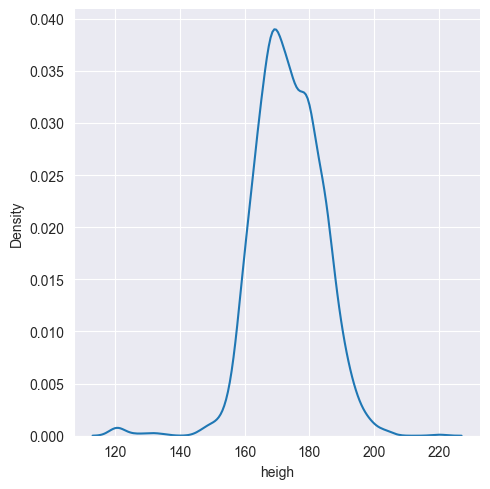

,count,mean,min,25%,50%,75%,max,std
geschlecht,,,,,,,,
0.0,431.0,167.765661,149.0,163.0,168.0,172.0,220.0,6.876541
1.0,244.0,179.061475,120.0,174.0,179.5,185.0,204.0,9.006189
2.0,3.0,160.000000,120.0,145.0,170.0,180.0,190.0,36.055513


In [13]:
sns.displot(data=bl, x="heigh", kind="kde")
plt.show()

bl.groupby('geschlecht').describe()['heigh']

## Weight distribution

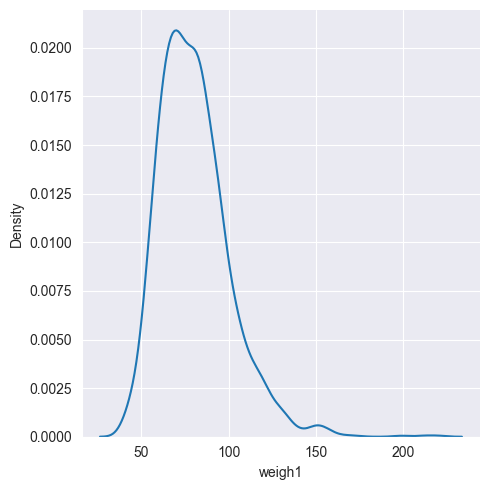

,count,mean,min,25%,50%,75%,max,std
geschlecht,,,,,,,,
0.0,429.0,73.125874,40.0,61.0,68.0,82.0,172.0,18.461959
1.0,244.0,89.229508,50.0,75.0,87.0,98.0,154.0,18.174412
2.0,3.0,91.333333,42.0,54.5,67.0,116.0,165.0,65.010256


In [14]:
sns.displot(data=bl, x="weigh1", kind="kde")
plt.show()

bl.groupby('geschlecht').describe()['weigh1']

## BMI


In [15]:
bl['bmi'] = bl['weigh1'] / ((bl['heigh']/100) ** 2)
bl.bmi.describe()

count    1772.000000
mean       26.658209
std         6.232164
min         8.264463
25%        22.515191
50%        25.432398
75%        29.377583
max        80.808081
Name: bmi, dtype: float64

## Lifestyle Habits at baseline

In [16]:
# Lifestyle habits at baseline
# - Smokers
print('Daily smokers (%):', bl[bl['smoke1'] == 1].shape[0],
      f"({round(bl[bl['smoke1'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - Daily fruit consumers before lockdown
print('Daily fruit consumers before lockdown (%):', bl[bl['fruit1'] == 1].shape[0],
      f"({round(bl[bl['fruit1'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - Daily fruit consumers after lockdown
print('Daily fruit consumers after lockdown (%):', bl[bl['fruit2'] == 1].shape[0],
      f"({round(bl[bl['fruit2'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - Daily vegetable consumers before lockdown
print('Daily vegetable consumers before lockdown (%):', bl[bl['veget1'] == 1].shape[0],
      f"({round(bl[bl['veget1'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - Daily vegetable consumers after lockdown
print('Daily vegetable consumers after lockdown (%):', bl[bl['veget2'] == 1].shape[0],
      f"({round(bl[bl['veget2'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - History of hypertension
print('History of hypertension (%):', bl[bl['hyper1'] == 1].shape[0],
      f"({round(bl[bl['hyper1'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - History of diabetes mellitus
print('History of diabetes mellitus (%):', bl[bl['diabe1'] == 1].shape[0],
      f"({round(bl[bl['diabe1'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")

# - History of hyperlipidemia
print('History of hyperlipidemia (%):', bl[bl['blood1'] == 1].shape[0],
      f"({round(bl[bl['blood1'] == 1].shape[0] / bl.shape[0] * 100, 1)}%)")


Daily smokers (%): 292 (16.2%)
Daily fruit consumers before lockdown (%): 533 (29.5%)
Daily fruit consumers after lockdown (%): 538 (29.8%)
Daily vegetable consumers before lockdown (%): 562 (31.1%)
Daily vegetable consumers after lockdown (%): 559 (31.0%)
History of hypertension (%): 454 (25.2%)
History of diabetes mellitus (%): 113 (6.3%)
History of hyperlipidemia (%): 461 (25.5%)


In [17]:
1805*0.9873

1782.0765

## Sensor and app data

In [18]:
print('n Geographical data in baseline:\t', bl.sensordata_altitude.notnull().sum())
print()
print('tracking permission ratio:', bl.sensordata_altitude.notnull().sum()/bl.shape[0])
print('------------------------------------------------')
print('n Geographical data in followup:\t', fu.sensordata_altitude.notnull().sum())
print()
print('tracking permission ratio: \t', fu.sensordata_altitude.notnull().sum()/fu.shape[0])

n Geographical data in baseline:	 1366

tracking permission ratio: 0.756786703601108
------------------------------------------------
n Geographical data in followup:	 4673

tracking permission ratio: 	 0.7927056827820187


In [19]:
print('n permissions apps tracking in baseline:\t', bl.sensordata_apps.notnull().sum())
print()
print('tracking permission ratio', bl.sensordata_apps.notnull().sum()/bl.shape[0])
print('------------------------------------------------')
print('n permissions apps tracking in followup:\t', fu.sensordata_apps.notnull().sum())
print()
print('tracking permission ratio: \t', fu.sensordata_apps.notnull().sum()/fu.shape[0])

n permissions apps tracking in baseline:	 101

tracking permission ratio 0.05595567867036011
------------------------------------------------
n permissions apps tracking in followup:	 370

tracking permission ratio: 	 0.06276505513146735


In [20]:
!jupyter nbconvert --to html --no-input src/d01_analyse/RQ1/Analyse.ipynb

[NbConvertApp] Converting notebook src/d01_analyse/RQ1/Analyse.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 398756 bytes to src/d01_analyse/RQ1/Analyse.html
